# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 4а

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **27 марта в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'


#Теоретическая часть

1. 3 балла В 1963 году на одном из самолетов модели Boeing 720 были проведены измерения
времени между поломками системы кондиционирования (в часах):
 
 `487, 18, 100, 7, 98, 5, 85, 91, 43, 230, 3, 130`

 Данные хорошо описываются экспоненциальным распределением с параметром $\theta > 0$. Нахождение точечной и интервальной оценок $\theta$ имеет практическое применение.

 Пусть 

  $X_1,\ldots,X_n$ &mdash; выборка из экспоненциального распределения с параметром $\theta$, т.е. $p_\theta(x) = \theta e^{-\theta x}I(x>0)$.

 Найдите точный доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ с помощью метода центральной функции. 
 
 Посчитайте реализацию доверительного интервала на предложенных данных, положив $\alpha = 0.95$.

 *Замечание. Экспоненциальное распределение также хорошо описывает время между соседними появлениями частицы на детекторе.*

**Решение:** известно, что для экспоненциального распределения $\overline{X}$ - АНО $\dfrac{1}{\theta} = \mathsf{E}X$ с асимптотической дисперсией $\frac{1}{\theta^2}$. Так как измерений $n$ получаем:

$$ \overline{X} - \dfrac{1}{\theta} \sim \mathcal{N}(0, \frac{1}{n\theta^2})$$
$$ \sqrt{n} \theta (\overline{X} - \frac{1}{\theta}) = G(x, \theta) \sim \mathcal{N}(0, 1)$$

Где G - центральная функция, тогда в соответствии с МЦФ доверительный интервал уровня доверия $\alpha$ будет выглядеть так:
$$ (z_{\frac{1 - \alpha}{2}} < \sqrt{n} \theta \overline{X} - \sqrt{n} < z_{\frac{1 + \alpha}{2}}), $$

где $z_\gamma$ - $\gamma$-квантиль стандартного нормально распредления.

Таким образом для $\theta$ получаем доверительный интервал:
$$ (\dfrac{1}{\overline{X}} + \dfrac{z_{\frac{1 - \alpha}{2}}}{\sqrt{n} \overline{X}} < \theta < \dfrac{1}{\overline{X}} + \dfrac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n} \overline{X}}) $$

В наших условиях:
$$ \alpha = 0,95; z_{\frac{1 \pm \alpha}{2}} = \pm 2,01; n = 12; \overline{X} = 108 $$
$$ \theta \in (3,67 \cdot 10^{-3}; 14,8 \cdot 10^{-3})$$
2. 5 баллов Пусть

 а) $X_1,\ldots,X_n$ &mdash; координаты пересечении гамма-лучей с горизонтальной прямой, являющиеся выборкой из распределения
	Коши со сдвигом, т.е.
	$
	p_{\theta}(x)=\frac 1{\pi(1+(x-\theta)^2)}.
	$

  б) $X_1,\ldots,X_n$ &mdash; выборка из
	гамма-распределения с параметрами $(\theta,\beta)$, $\beta$ известно.

Постройте асимптотический доверительный интервал для $\theta$
уровня доверия $\alpha$.


**Решение:**
По теореме из лекций асимптотический интервал можно построить следующим образом:
$$ \left( \widehat{\theta_n} - \frac{z_{\frac{1 + \alpha}{2}} \sigma(\widehat{\theta_n})}{\sqrt{n}}; \widehat{\theta_n} + \frac{z_{\frac{1 + \alpha}{2}} \sigma(\widehat{\theta_n})}{\sqrt{n}} \right) $$

Где $ \widehat{\theta_n} $ - АНО оцениваемого параметра, а $\sigma^2(\widehat{\theta_n})$ - асимптотическая дисперсия оценки.

Выпишем оценки и их дисперсии для наших распределений:

1) Для распределния Коши может быть две оценки: медиана и одношаговая оценка.
$$ \widehat{\theta_n} = \hat{\mu};     \sigma^2(\widehat{\theta_n}) = \frac{\pi^2}{4} - медиана$$
$$ \widehat{\theta_n} = \widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}}; \sigma^2(\widehat{\theta_n}) = 2 - одношаговая$$

2) Для Гамма-распределения из прошлого дз была получена оценка максимального правдоподобия и её асимптотическая дисперсия:
$$ \widehat{\theta_n} = \dfrac{\beta}{\overline{X}}; \sigma^2(\widehat{\theta_n}) = \frac{\theta^2}{\beta} $$

Обозначим $ z_{\frac{1 + \alpha}{2}} = z$ - соответствующая квантиль стандартного нормального распределения. Применив теорему , получим:
1) Для Коши
$$\left( \widehat{\mu} - z \frac{\pi}{2 \sqrt{n}}, \widehat{\mu} + z \frac{\pi}{2 \sqrt{n}} \right)$$
$$
\left( 
\widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}} - z \sqrt{\frac{2}{n}}, 
\widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}} + z \sqrt{\frac{2}{n}}
\right)
$$

2) Для Гамма-распределения

$$ \left( \frac{\beta}{\overline{X}} - \frac{z}{\overline{X}}\sqrt{\frac{\beta}{n}}; \frac{\beta}{\overline{X}} + \frac{z}{\overline{X}}\sqrt{\frac{\beta}{n}}  
\right)$$

# Практическая часть


### Задача 3 .

10 баллов

В этой задаче нужно визуализировать доверительные интервалы. 

Рассмотрим пример построения доверительного интервала для оценки $\theta$ для выборки из $\mathcal{N}(\theta, 1)$. Приведенный ниже код строит график зависимости оценки $\overline{X}$, а также границ доверительного интервала $\left(\overline{X} - \frac{2}{\sqrt{n}}, \overline{X} + \frac{2}{\sqrt{n}}\right)$ от размера выборки $n$. В примере рассматривается реализация выборки размера 200 из стандартного нормального распределения и построенные по всем начальным подвыборкам оценка и доверительный интервал.



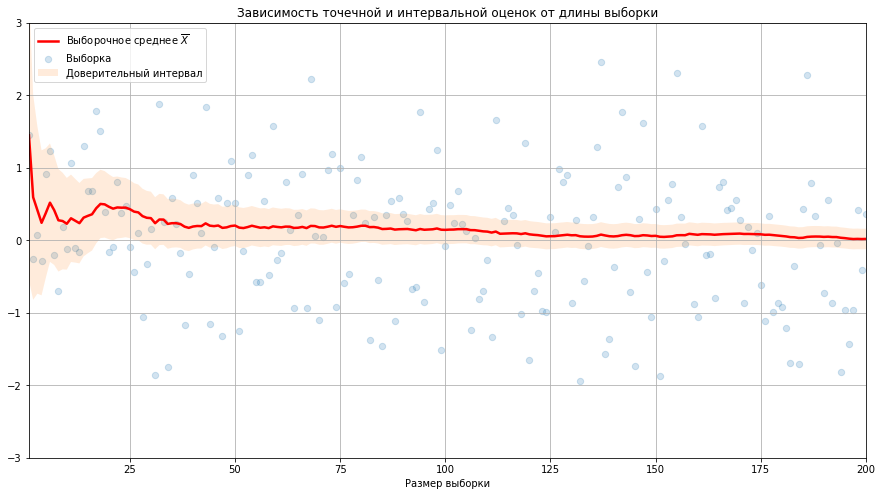

In [4]:
sample = sps.norm.rvs(size=200)  # выборка

time = np.arange(1, 201)
means = sample.cumsum() / np.arange(1, 201)  # оценка

plt.figure(figsize=(15, 8))
plt.scatter(time, sample, alpha=0.2, s=40, label='Выборка')  # s - размер точек
plt.plot(time, means, color='red', linewidth=2.5, label='Выборочное среднее $\overline{X}$')  # linewidth - толщина линии

# заполняет пространство между двумя функциями
plt.fill_between(time, means + 2 / np.sqrt(time), means - 2 / np.sqrt(time), label = 'Доверительный интервал', alpha=0.15)

plt.legend()
plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
plt.ylim((-3, 3))  # размеры графика по вертикальной оси 
plt.xlabel('Размер выборки')  # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Зависимость точечной и интервальной оценок от длины выборки')  # имя графика
plt.grid()  # добавляем сетку
plt.show()

Чтобы не плодить код, напишите следующую функцию (см. ниже). Можете опираться на пример выше. При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".


In [20]:
#Рисует доверительный интервал и оценку в зависимости от размера выборки.
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):  
    """
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки

    Функция ничего не возвращает.
    """

    time = np.arange(1, len(left) + 1)
    plt.fill_between(time, right, left, label = 'Доверительный интервал', alpha=0.15, color=color_interval)

    if not sample is None:
        plt.scatter(time, sample, alpha=0.2, s=40, 
                    label='Выборка', color=color_sample)  # s - размер точек
    if not estimation is None:
        plt.plot(time, estimation, color=color_estimation, 
                 linewidth=2.5, label=label_estimation)  # linewidth - толщина линии


    
    plt.xlim((1, len(left)))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
    plt.ylim(ylim)  # размеры графика по вертикальной оси 
    plt.xlabel('Размер выборки')  # название горизонтальной оси (аналогично plt.ylabel)
    plt.title('Зависимость точечной и интервальной оценок от длины выборки')  # имя графика
    plt.grid()  # добавляем сетку

Рассмотрим выборку $X_1, ... X_{100}$ из стандартного распределения Коши и  доверительные интервалы для следующих случаев

* точный доверительный интервал в параметрической модели $\mathcal{N}(\theta, 1)$ *&mdash; выведен на лекции 5, см. замечание ниже*;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану в качестве асимптотически нормальной оценки;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку *, т.е имеющую наименьшую асимптотическую дисперсию. Вспомните лекцию 4 и прошлое ДЗ. Значение ее асимптотической дисперии можно взять с лекции без пояснений*.

Последние два интервала постройте с помощью метода построения асимптотических доверительных интервалов с лекции 5. Наверняка, какой-то из них у вас уже получился в теоретической части ДЗ. 

*Замечание.*

Первый пример призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.

Выпишите формулы для всех используемых интервалов.







**Ответ:** 
1) Точный доверительный интервал уровня доверия $\alpha$ минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

Доверительный интервал: 

$$
\left(\overline{X} - \frac{\sigma z_{(1+\alpha)/2}}{\sqrt{n}},
\overline{X} + \frac{\sigma z_{(1+\alpha)/2}}{\sqrt{n}}\right),
$$

где $\sigma = 1$, а $z_{\gamma}$ &mdash; $\gamma$-квантиль стандартного нормального распределения.

Таким образом, мы нашли точный доверительный интервал.

У стандартного нормального распределения график плотности симметричен относительно оси Oy и убывает на положительной полуоси. Поэтому наименьшую длину среди интервалов с одинаковым уровнем доверия имеет симметричный относительно нуля. Ему соответствует квантиль уровня $\frac{1 + \alpha}{2}$. Так как границы искомого доверителного интервала зависят линейно от границ этого отрезка, то чтобы получить доверительный интервал наименьшей длины, надо выбрать отрезок наименьшей длины. Ему соответствует квантиль уровня  $\frac{1 + \alpha}{2}$

2) Из задачи 1 оценка параметра распределения Коши:

$$\left( \widehat{\mu} - z \frac{\pi}{2 \sqrt{n}}, \widehat{\mu} + z \frac{\pi}{2 \sqrt{n}} \right)$$
$$
\left( 
\widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}} - z \sqrt{\frac{2}{n}}, 
\widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}} + z \sqrt{\frac{2}{n}}
\right)
$$

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

*Замечание.*

Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 



In [24]:
#Приготовления
size = 100
sample = sps.cauchy(loc=0).rvs(size=size)
alpha = 0.95 #уровень доверия
z = sps.norm.ppf(1/2 + alpha/2) #квантиль
n = np.arange(1, size + 1, 1)

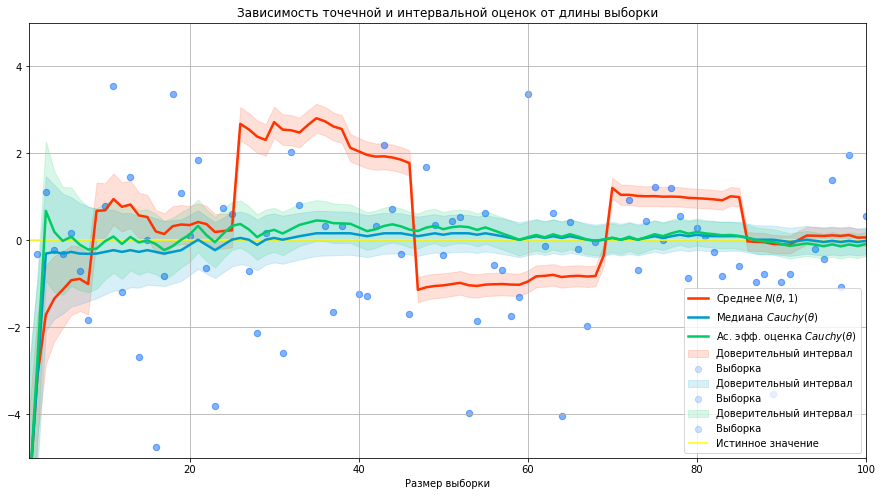

In [25]:
#Считаем оценки

#Среднее
mean = np.cumsum(sample) / n
#Медиана
med = np.zeros(size)
for i in range(1, size + 1):
    med[i - 1] = np.median(sample[:i])
#Одношаговая оценка
theta = med + np.cumsum((sample - med) / (1 + (sample - med) ** 2)) / np.cumsum((1 - (sample - med) ** 2) / ((1 + (sample - med) ** 2) ** 2))

#Выводим
plt.figure(figsize=(15, 8))
    
estimation = mean
left = estimation - z / n ** 0.5
right = estimation + z / n ** 0.5
draw_confidence_interval(
    left, right, estimation, sample, (-5, 5),
    red, red, label_estimation=r'Среднее $N(\theta, 1)$')

estimation = med
left = estimation - z * np.pi / (2 * n ** 0.5)
right = estimation + z * np.pi / (2 * n ** 0.5)
draw_confidence_interval(
    left, right, estimation, sample, (-5, 5),
    blue, blue, label_estimation=r'Медиана $Cauchy(\theta)$')

estimation = theta
left = estimation - z / (n / 2) ** 0.5
right = estimation + z / (n / 2) ** 0.5
draw_confidence_interval(
    left, right, estimation, sample, (-5, 5),
    green, green, label_estimation=r'Ас. эфф. оценка $Cauchy(\theta)$')

plt.hlines(0, 1, 100, color='yellow', label='Истинное значение')
plt.legend()
plt.show()

Сравните полученные интервалы.

**Вывод:** наиболее узкий интервал — у одношаговой оценки, что соответствует теоретическим свойства одношаговой оценки — в асимптотическом подходе данная оценка имеет наименьшую асимптотическую дисперсию среди всех оценок, которые имеют непрерывную асимтпотическую дисперсию. Хуже всех показала себя параметрическая модель нормального распределения, так как распределение не то, также у распределения Коши не существует матожидания, а среднее по выборке имеет то же самое распределение, что и один элемент выборки. Выборочная медиана дает более хороший доверительный интервал, но одношаговая оценка все же лучше.